In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
data = pd.read_csv("book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [3]:
data["reviewText"][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [13]:
data["reviewText_clean_2"] = data["reviewText"].str.lower()

In [7]:
data["reviewText_clean"] = data["reviewText_clean"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

In [8]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,cleanandfunnyabitbusywithallthedifferentplotsg...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alexasexyhotcopandthephdcandidatewhatamatchtha...
2,1463,Good thing that this is a free story. I read i...,1,goodthingthatthisisafreestoryireaditafewyearsa...
3,10342,"Action, action, action! Equipment keeps gettin...",4,actionactionactionequipmentkeepsgettingblownup...
4,5256,this was hands down the worse book i have ever...,1,thiswashandsdowntheworsebookihaveeverreadandtr...


In [14]:
data["reviewText_clean_2"] = data["reviewText_clean_2"].apply(lambda x: re.sub(r"[^\w\s]", " ", x))

In [15]:
data.head()

,index,reviewText,rating,reviewText_clean,reviewText_clean_2
0,11494,Clean and funny. A bit busy with all the diffe...,3,cleanandfunnyabitbusywithallthedifferentplotsg...,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alexasexyhotcopandthephdcandidatewhatamatchtha...,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1,goodthingthatthisisafreestoryireaditafewyearsa...,good thing that this is a free story i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,actionactionactionequipmentkeepsgettingblownup...,action action action equipment keeps gettin...
4,5256,this was hands down the worse book i have ever...,1,thiswashandsdowntheworsebookihaveeverreadandtr...,this was hands down the worse book i have ever...


In [16]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [17]:
data["vader_sentiment_score"] = data["reviewText_clean_2"].apply(lambda x: sentiment_analyzer.polarity_scores(x)["compound"])

In [18]:
data.head(10)

,index,reviewText,rating,reviewText_clean,reviewText_clean_2,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,cleanandfunnyabitbusywithallthedifferentplotsg...,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alexasexyhotcopandthephdcandidatewhatamatchtha...,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,goodthingthatthisisafreestoryireaditafewyearsa...,good thing that this is a free story i read i...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,actionactionactionequipmentkeepsgettingblownup...,action action action equipment keeps gettin...,0.6652
4,5256,this was hands down the worse book i have ever...,1,thiswashandsdowntheworsebookihaveeverreadandtr...,this was hands down the worse book i have ever...,-0.4767
5,7277,"Great book packed full with fast cars , crazy ...",4,greatbookpackedfullwithfastcarscrazyhotmenandd...,great book packed full with fast cars crazy ...,0.7269
6,9781,I enjoyed the reader's digest very much. If I ...,4,ienjoyedthereadersdigestverymuchificouldfigure...,i enjoyed the reader s digest very much if i ...,0.5106
7,4583,This series has been good and I look forward t...,5,thisserieshasbeengoodandilookforwardtoanymores...,this series has been good and i look forward t...,0.7906
8,9797,I just could not get into this book.I all ways...,1,ijustcouldnotgetintothisbookiallwaysreadabookw...,i just could not get into this book i all ways...,0.0000
9,895,it was good to see where Dan and Elle was. And...,4,itwasgoodtoseewheredanandellewasandthattheywas...,it was good to see where dan and elle was and...,0.8107


In [19]:
bins = [-1, -0.1, 0.1, 1]
names = ["Negative", "Neutral", "Positive"]
data["vader_sentiment_label"] = pd.cut(data["vader_sentiment_score"], bins, labels=names)

In [20]:
data.head()

,index,reviewText,rating,reviewText_clean,reviewText_clean_2,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,cleanandfunnyabitbusywithallthedifferentplotsg...,clean and funny a bit busy with all the diffe...,0.7684,Positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alexasexyhotcopandthephdcandidatewhatamatchtha...,alex a sexy hot cop and the phd candidate wha...,0.9325,Positive
2,1463,Good thing that this is a free story. I read i...,1,goodthingthatthisisafreestoryireaditafewyearsa...,good thing that this is a free story i read i...,0.6740,Positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,actionactionactionequipmentkeepsgettingblownup...,action action action equipment keeps gettin...,0.6652,Positive
4,5256,this was hands down the worse book i have ever...,1,thiswashandsdowntheworsebookihaveeverreadandtr...,this was hands down the worse book i have ever...,-0.4767,Negative


<Axes: xlabel='vader_sentiment_label'>

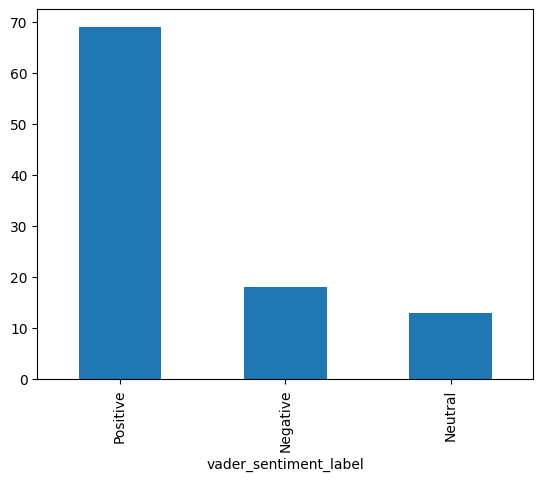

In [21]:
data["vader_sentiment_label"].value_counts().plot.bar()